In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
from scipy.stats import randint
from pandas import set_option
plt.style.use('ggplot')

from sklearn.feature_selection import RFE #For cross validation

df = pd.read_csv('/kaggle/input/credit-card-defaulter-prediction/Credit Card Defaulter Prediction.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [25]:
df.shape

(30000, 25)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [27]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [29]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [30]:
df.SEX = df.SEX.replace(['M','F'],[1,0]).astype(int)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,0,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,0,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,0,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,0,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,1,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [31]:
df.EDUCATION = df.EDUCATION.replace(['University', 'Graduate school', 'High School', 'Unknown',
       'Others', '0'],[1,2,3,4,5,6]).astype(int)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,0,1,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,0,1,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,0,1,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,0,1,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,1,1,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [32]:
df.MARRIAGE.unique()

array(['Married', 'Single', 'Other', '0'], dtype=object)

In [33]:
df.MARRIAGE = df.MARRIAGE.replace(['Married', 'Single', 'Other', '0'],[1,2,3,4]).astype(int)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,0,1,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,0,1,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,0,1,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,0,1,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,1,1,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  int64 
 3   EDUCATION  30000 non-null  int64 
 4   MARRIAGE   30000 non-null  int64 
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [35]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default '],
      dtype='object')

In [36]:
df['default '].unique()

array(['Y', 'N'], dtype=object)

In [37]:
df['default '] = df['default '].replace(['Y','N'],[1,0]).astype(int)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,0,1,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,1,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,1,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,1,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,1,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default '],
      dtype='object')

In [39]:
#Now we seperate features and target
features = df.drop(columns=['default '], axis=1)
y = df['default ']

df.EDUCATION.unique()

array([1, 2, 3, 4, 5, 6])

In [40]:
df.EDUCATION = np.where(df.EDUCATION == 5,4, df.EDUCATION)
df.EDUCATION = np.where(df.EDUCATION == 6,4, df.EDUCATION)
df.EDUCATION = np.where(df.EDUCATION == 0,4, df.EDUCATION)

df.EDUCATION.unique()


array([1, 2, 3, 4])

In [41]:
df.MARRIAGE = np.where(df.MARRIAGE == 0,3,df.MARRIAGE)
df.MARRIAGE.unique()

array([1, 2, 3, 4])

## EDA

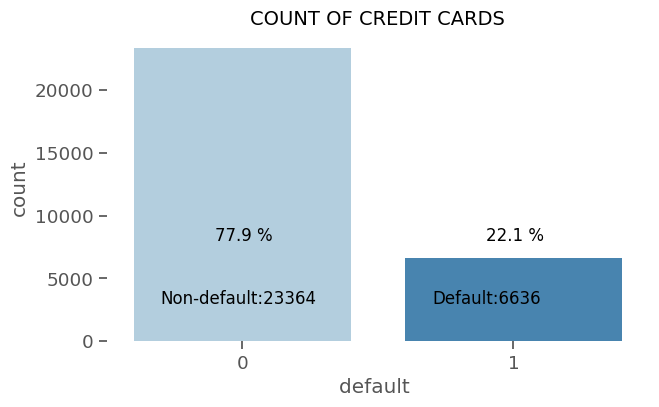

In [42]:
#NOW we will mao the target: categorize

#The frequency of defaults
yes = df['default '].sum()
no = len(df)-yes

#Percentage
yes_perc = round(yes/len(df)*100,1)
no_perc = round(no/len(df)*100,1)

import sys
plt.figure(figsize=(7,4))
sns.set_context('notebook',font_scale=1.2)
sns.countplot(x='default ', data=df, palette='Blues')
plt.annotate('Non-default:{}'.format(no),xy=(-0.3,15000), xytext=(-0.3,3000), size=12)
plt.annotate('Default:{}'.format(yes),xy=(0.7,15000), xytext=(0.7,3000), size=12)
plt.annotate(str(no_perc)+' %',xy=(-0.3,15000), xytext=(-0.1,8000), size=12)
plt.annotate(str(yes_perc)+' %',xy=(0.7,15000), xytext=(0.9,8000), size=12)
plt.title('COUNT OF CREDIT CARDS',size=14)

#Removing the frame
plt.box(False);


In [43]:
#Now we check some descriptive statistics
pd.set_option('display.width',100)
pd.set_option('display.precision',2)

print('SUMMARY STATS OF NUMERIC COLUMNS')
print()
print(df.describe().T)

SUMMARY STATS OF NUMERIC COLUMNS

             count       mean        std       min       25%       50%        75%       max
ID         30000.0   15000.50    8660.40       1.0   7500.75   15000.5   22500.25  3.00e+04
LIMIT_BAL  30000.0  167484.32  129747.66   10000.0  50000.00  140000.0  240000.00  1.00e+06
SEX        30000.0       0.40       0.49       0.0      0.00       0.0       1.00  1.00e+00
EDUCATION  30000.0       1.73       0.79       1.0      1.00       2.0       2.00  4.00e+00
MARRIAGE   30000.0       1.56       0.53       1.0      1.00       2.0       2.00  4.00e+00
AGE        30000.0      35.49       9.22      21.0     28.00      34.0      41.00  7.90e+01
PAY_0      30000.0      -0.02       1.12      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_2      30000.0      -0.13       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_3      30000.0      -0.17       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_4      30000.0      -0.22       1.17      

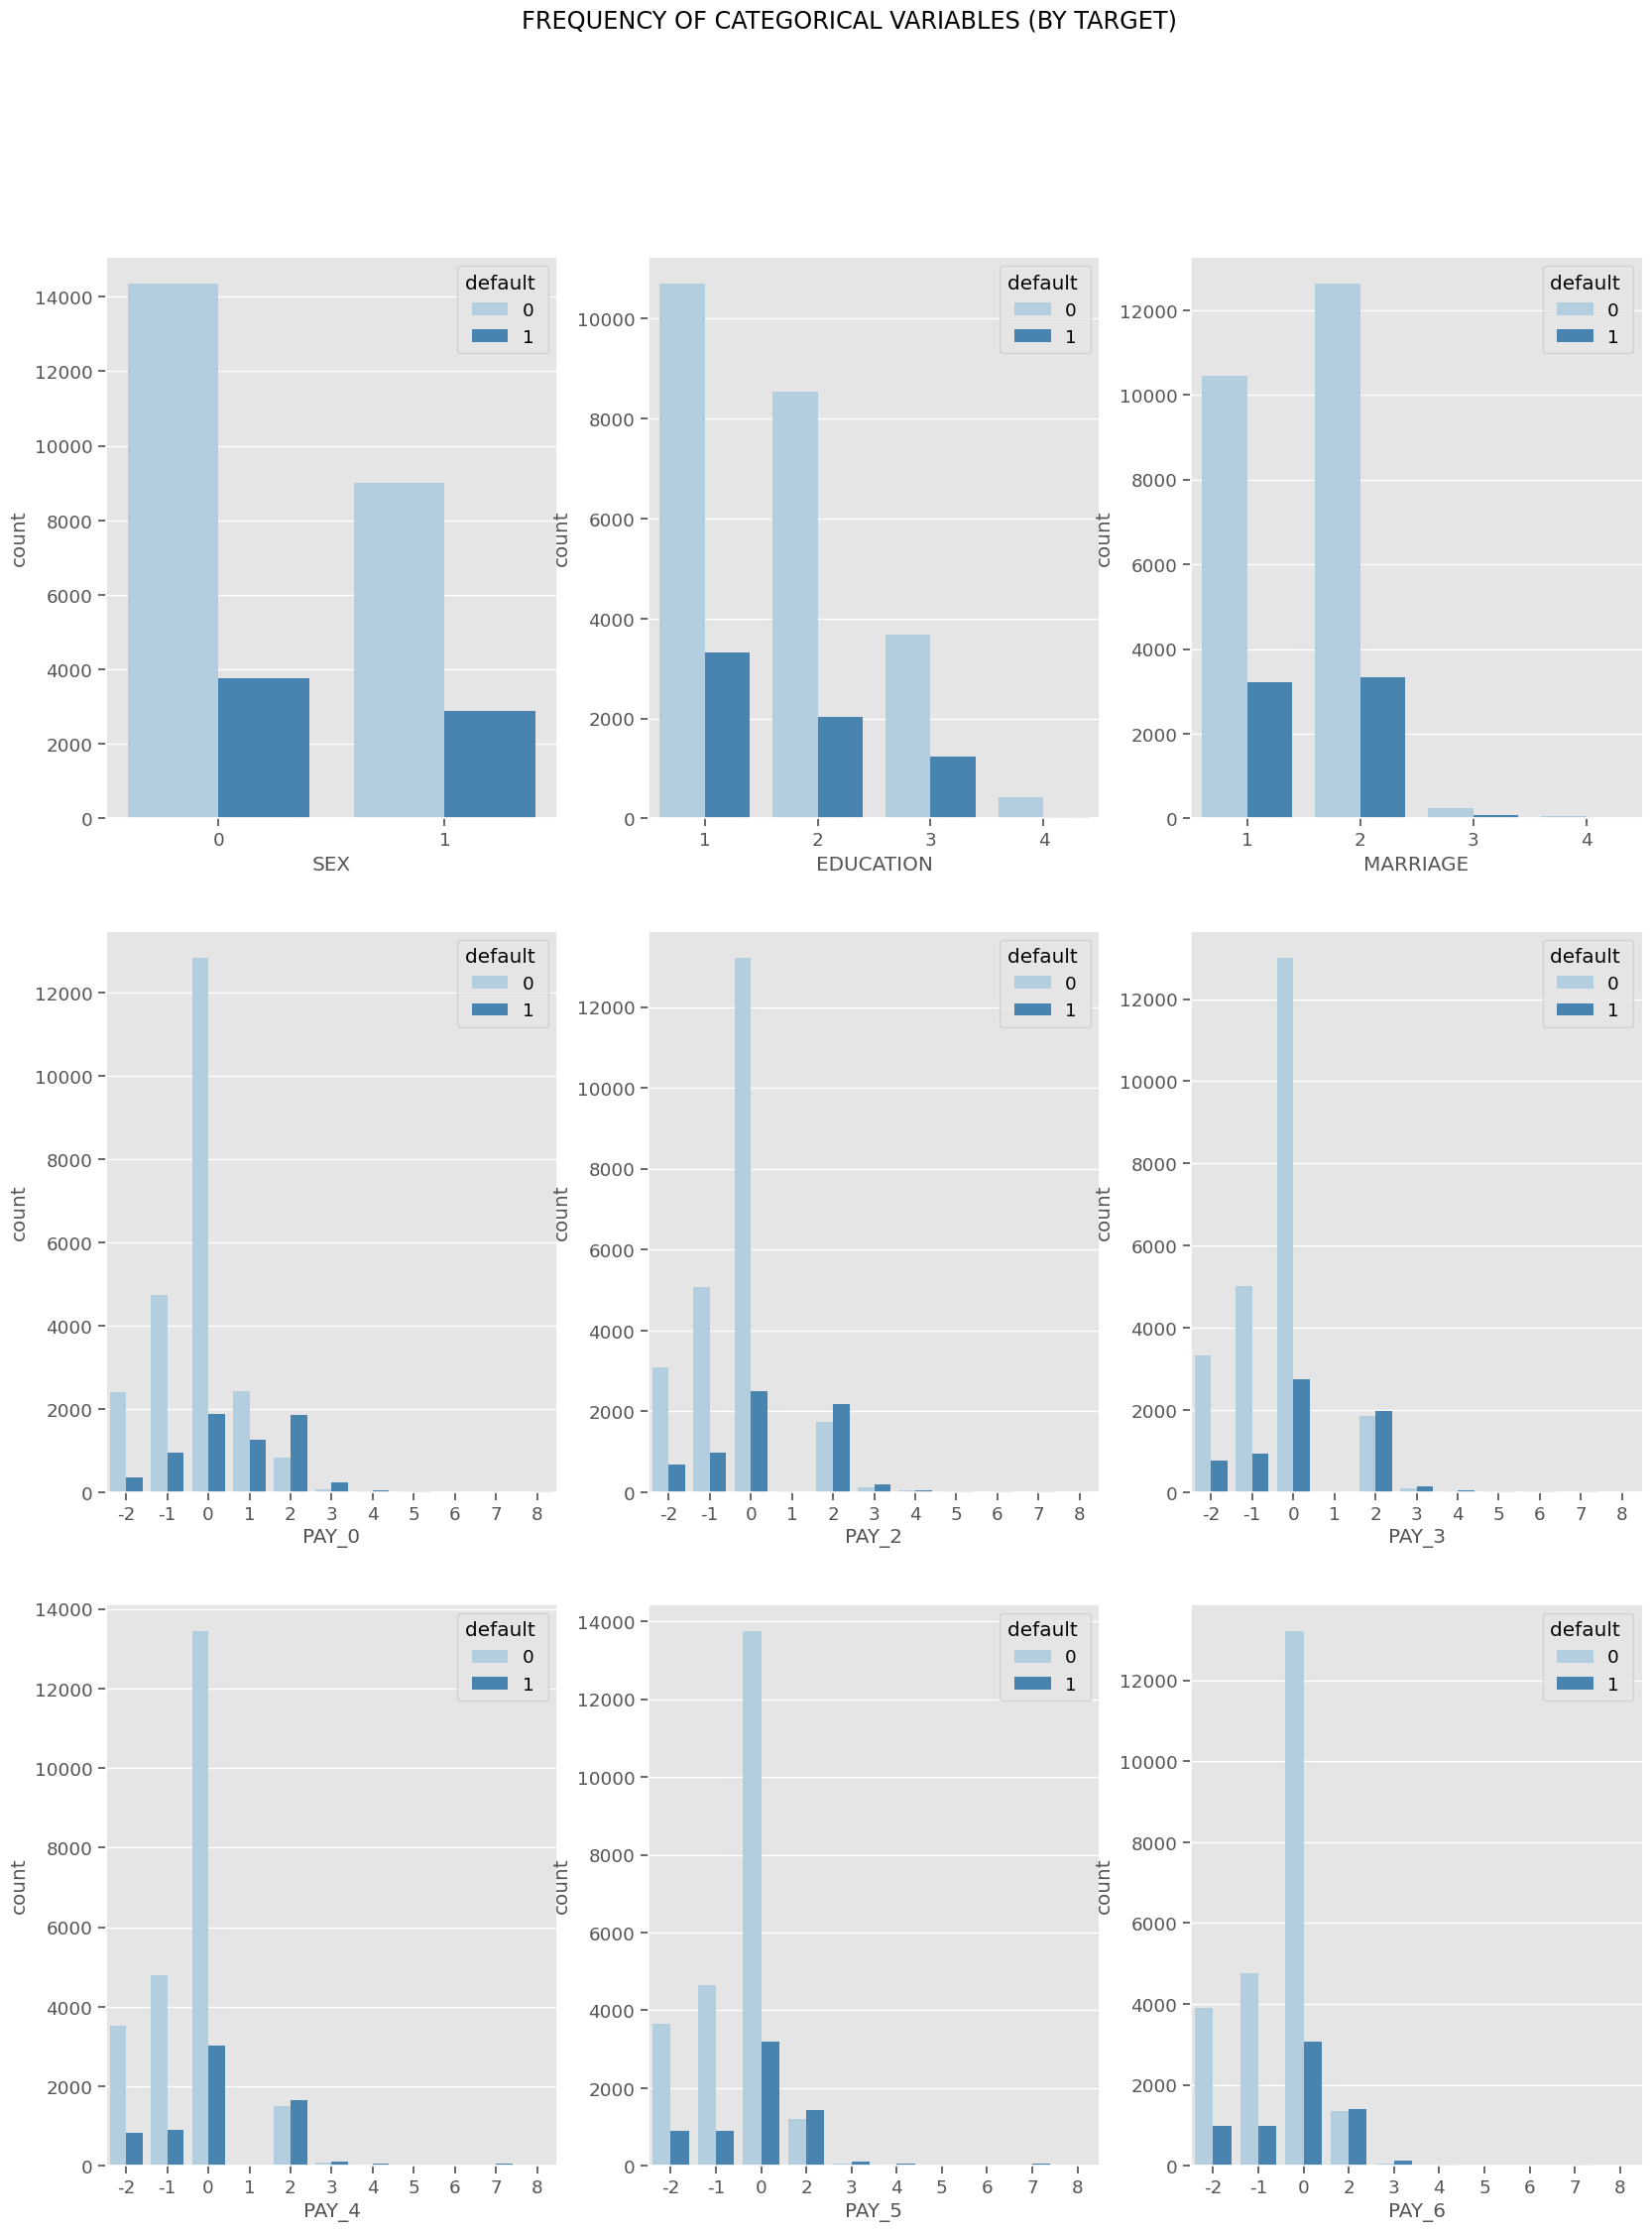

In [44]:
#Creating a new df with categorical variables
subset = df[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default ']]

f, axes = plt.subplots(3,3, figsize=(20,25), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x='SEX',hue='default ', data=subset, palette='Blues',ax=axes[0,0])
ax2 = sns.countplot(x='EDUCATION',hue='default ', data=subset, palette='Blues',ax=axes[0,1])
ax3 = sns.countplot(x='MARRIAGE',hue='default ', data=subset, palette='Blues',ax=axes[0,2])
ax4 = sns.countplot(x='PAY_0',hue='default ', data=subset, palette='Blues',ax=axes[1,0])
ax5 = sns.countplot(x='PAY_2',hue='default ', data=subset, palette='Blues',ax=axes[1,1])
ax6 = sns.countplot(x='PAY_3',hue='default ', data=subset, palette='Blues',ax=axes[1,2])
ax7 = sns.countplot(x='PAY_4',hue='default ', data=subset, palette='Blues',ax=axes[2,0])
ax8 = sns.countplot(x='PAY_5',hue='default ', data=subset, palette='Blues',ax=axes[2,1])
ax9 = sns.countplot(x='PAY_6',hue='default ', data=subset, palette='Blues',ax=axes[2,2])



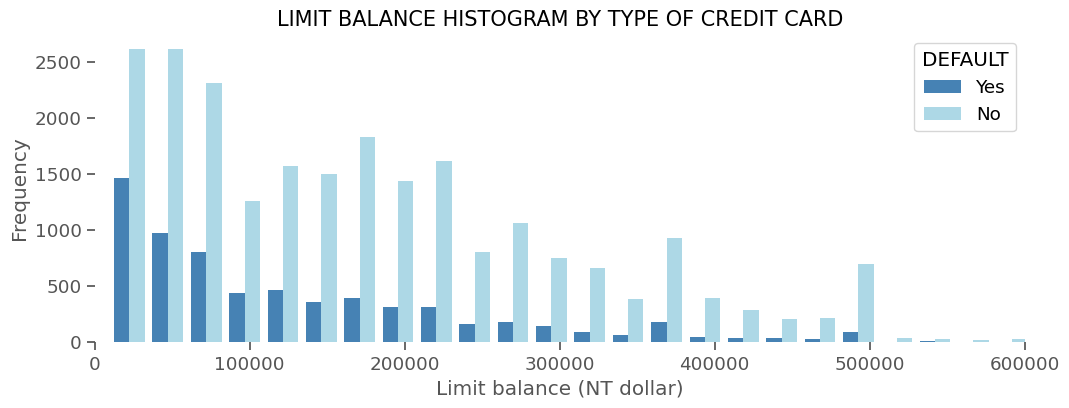

In [45]:
#Seperate the limit balance based on the default status
x1 = list(df[df['default '] == 1]['LIMIT_BAL'])
x2 = list(df[df['default '] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook',font_scale=1.2)

#Plot the histogram
plt.hist([x1,x2],bins=40,density=False,color=['steelblue','lightblue'])
plt.xlim([0,600000])
#Add a legend
plt.legend(['Yes','No'], title='DEFAULT',loc = 'upper right',facecolor='white')

#Add labels and titles
plt.xlabel('Limit balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', size=15)

#remove the frame
plt.box(False)

plt.show()

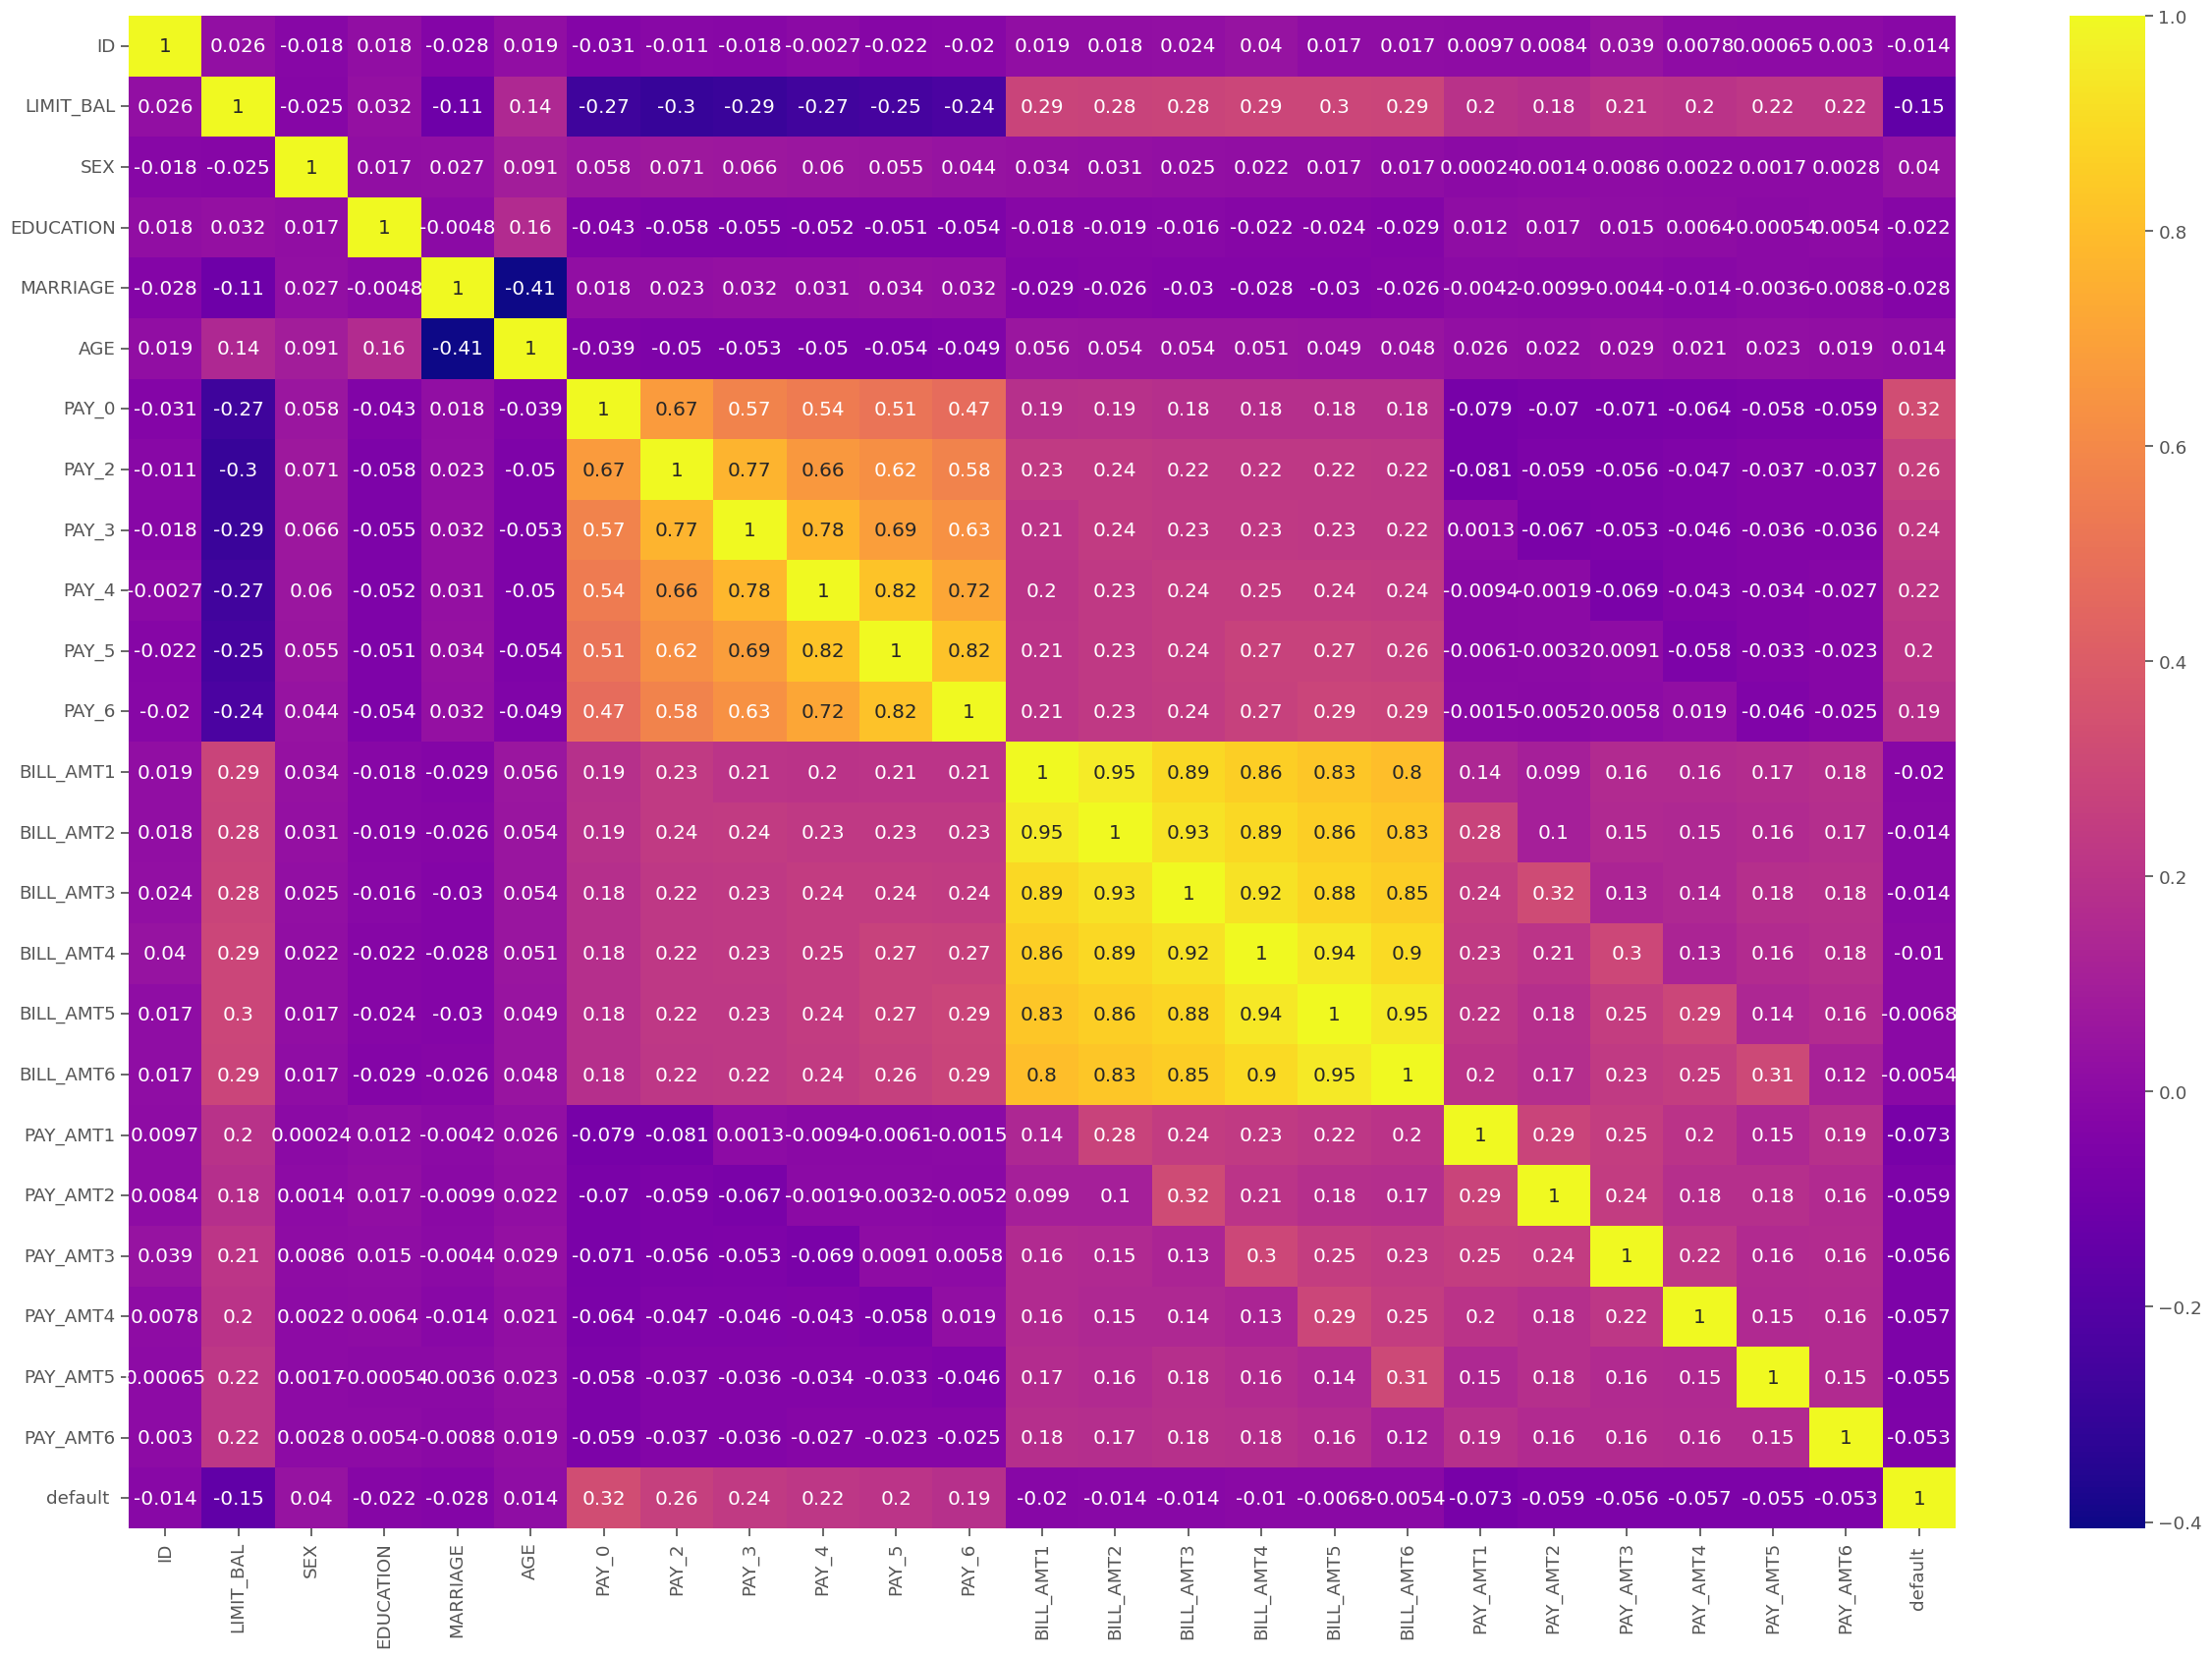

In [48]:
#COrrelations
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [49]:
#Now split the target and features
x = df.drop(['default '],axis=1)
y = df['default ']

#Apply the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selections
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#objects
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
lgb = LGBMClassifier()
cat = CatBoostClassifier()

#Fittings
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [50]:
rf.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [51]:
gb.fit(x_train_scaled,y_train)

GradientBoostingClassifier()

In [52]:
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
svc.fit(x_train_scaled,y_train)

SVC()

In [54]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [55]:
nb.fit(x_train_scaled,y_train)

GaussianNB()

In [56]:
lgb.fit(x_train_scaled,y_train)

[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3524
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[LightGBM] [Info] Start training from score -1.255256


LGBMClassifier()

In [ ]:
cat.fit(x_train_scaled,y_train)

In [58]:
#preds
lrpred = lr.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
svcpred = svc.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
nbpred = nb.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import accuracy_score
lracc = accuracy_score(y_test,lrpred)
rfacc = accuracy_score(y_test,rfpred)
gbacc = accuracy_score(y_test,gbpred)
xgbacc = accuracy_score(y_test,xgbpred)
svcacc = accuracy_score(y_test,svcpred)
knnacc = accuracy_score(y_test,knnpred)
nbacc = accuracy_score(y_test,nbpred)
lgbacc = accuracy_score(y_test,lgbpred)
catacc = accuracy_score(y_test,catpred)

print('LOGISTIC REG',lracc)
print('RANDOM FOREST',rfacc)
print('GB',gbacc)
print('XGB',xgbacc)
print('SVC',svcacc)
print('KNN',knnacc)
print('NB',nbacc)
print('LIGHT GBM',lgbacc)
print('CATO',catacc)

LOGISTIC REG 0.8093333333333333
RANDOM FOREST 0.8175
GB 0.8201666666666667
XGB 0.8136666666666666
SVC 0.818
KNN 0.795
NB 0.7138333333333333
LIGHT GBM 0.8198333333333333
CATO 0.8211666666666667


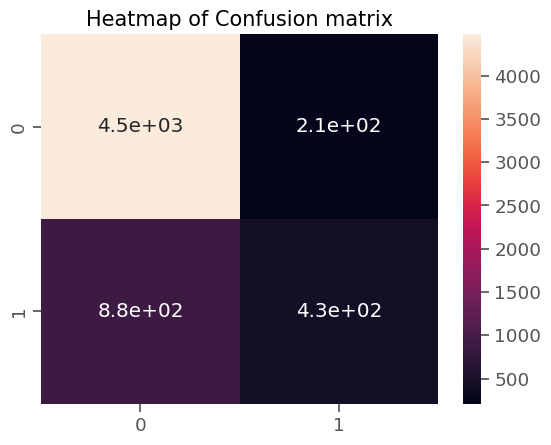

In [59]:
#NOW CHECK THE CONFUSION MATRIX(for specific model)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,svcpred) #Enter the model pred here
plt.title('Heatmap of Confusion matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [60]:
#NOW CHECK THE CLASSIFICATION REPORT 
#NOW we will check the classification report
print(classification_report(y_test,svcpred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4687
           1       0.67      0.33      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [62]:
#(TO CHECK IF THE MODEL HAS OVERFITTED OR UNDERFITTED)

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(estimator=svc,X=x_train_scaled,y=y_train)
print('Cross Val Acc Score of SVC model is ---> ',cross_val)
print('\n Cross Val Mean Acc Score of SVC model is ---> ',cross_val.mean())

Cross Val Acc Score of SVC model is --->  [0.81833333 0.82541667 0.81645833 0.81875    0.81854167]

 Cross Val Mean Acc Score of SVC model is --->  0.8195
